# Proyecto 13

## Análisis exploratorio de los datos (EDA)

Se agregan los datos y se hace una exploración del contenido para determinar si el nombre de
las columnas y los tipo de datos son correctos. También si existen valores ausentes o nulos y
filas duplicadas.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Read DataFrame
df = pd.read_csv('./gym_churn_us.csv',sep = ',', header=0)

In [3]:
# Show DataFrame
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [4]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El nombre de las columnas está bien, no hay valores ausentes y no hay ninguna columna de categorías.

In [5]:
# Verify the number of null values per column
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# Delete duplicated rows
df = df.drop_duplicates().reset_index(drop=True)
# Show duplicated rows
df.duplicated().sum()

0

A continuación se muestran algunas métricas.

In [7]:
# Descriptive Statistics
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Se puede observar que no hay valores mínimos negativos para ninguna columna. Luego, al dividir por estado de cancelación o no, se tiene,

In [8]:
# Group by 'Churn' and obtain mean of all columns
df_by_churn = df.groupby(by='Churn').mean()

# Convert Series to DataFrame
df_by_churn.reset_index()
df_by_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Conclusión:** Los factores como: 'Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total' y 'Avg_class_frequency_current_month' en promedio son menores en los usuarios que cancelaron (segunda fila). Estos datos tienen sentido, dado que si un usuario no está muy convencido del gym, el valor promedio en las columnas 'Avg_additional_charges_total', 'Month_to_end_contract' y 'Avg_class_frequency_total' es bajo; si el usuario no vive cerca o es nuevo, el valor promedio de las columnas 'Near_Location' y 'Lifetime' tambien será bajo, etc.

A continuación se muestran la distribución de los datos usando gráfico de barras.

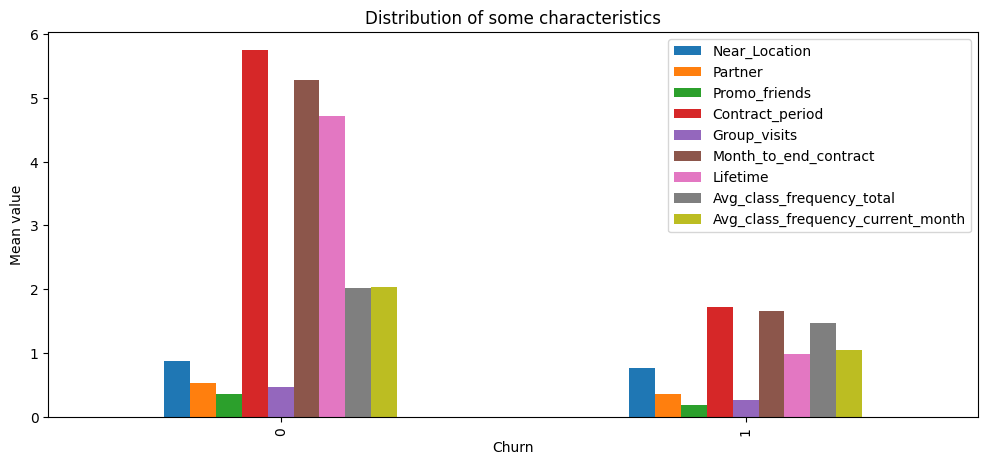

In [9]:
# Select a few columns only
df_by_churn_ = df_by_churn.drop(labels=['gender','Phone','Age','Avg_additional_charges_total'],axis=1)

# Bar plot
df_by_churn_.plot(kind='bar', figsize=[12,5], title='Distribution of some characteristics',
xlabel='Churn', ylabel='Mean value')
plt.show()

El gráfico de arriba corrobora la conclusión anterior.

## Preprocesamiento de datos

A continuación se muestran la distribución de los datos usando diagrama de cajas para detectar outliers.

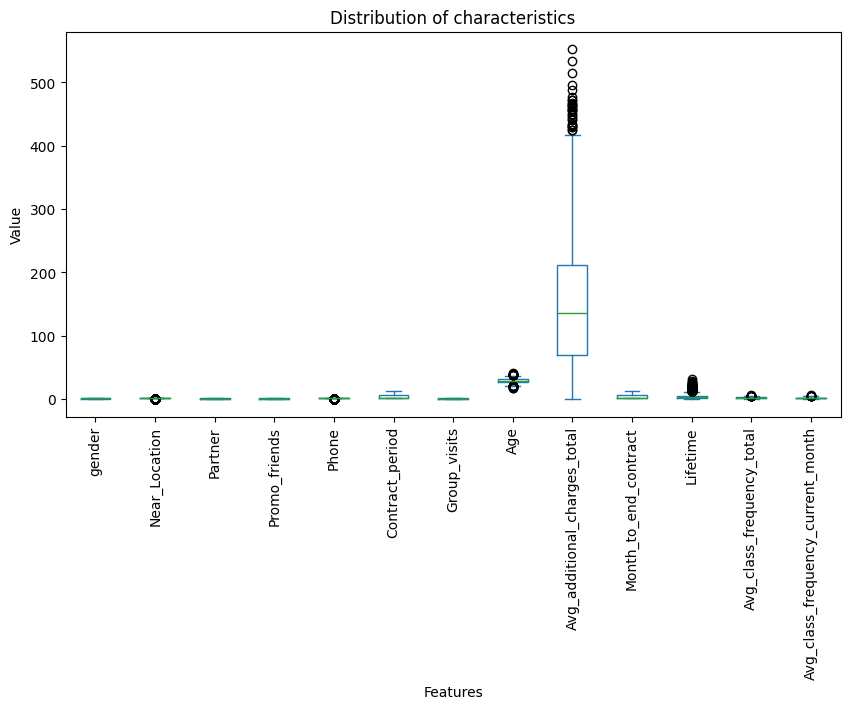

In [10]:
# Box plot
df.drop('Churn',axis=1).plot(kind='box', figsize=[10,5], title='Distribution of characteristics',
xlabel='Features', ylabel='Value')
plt.xticks(rotation=90)
plt.show()

Se igualarán todos los outliers de todas las columnas a los valores de los percentiles 5 y 95.

In [11]:
# Limit outliers to percentile 5 or percentile 95
for col in df.drop('Churn',axis=1).columns:
    percentile05 = df[col].quantile(0.05)
    percentile95 = df[col].quantile(0.95)
    for index,value in df[col].items():
        if value < percentile05:
            df.loc[index,col] = percentile05
        if value > percentile95:
            df.loc[index,col] = percentile95

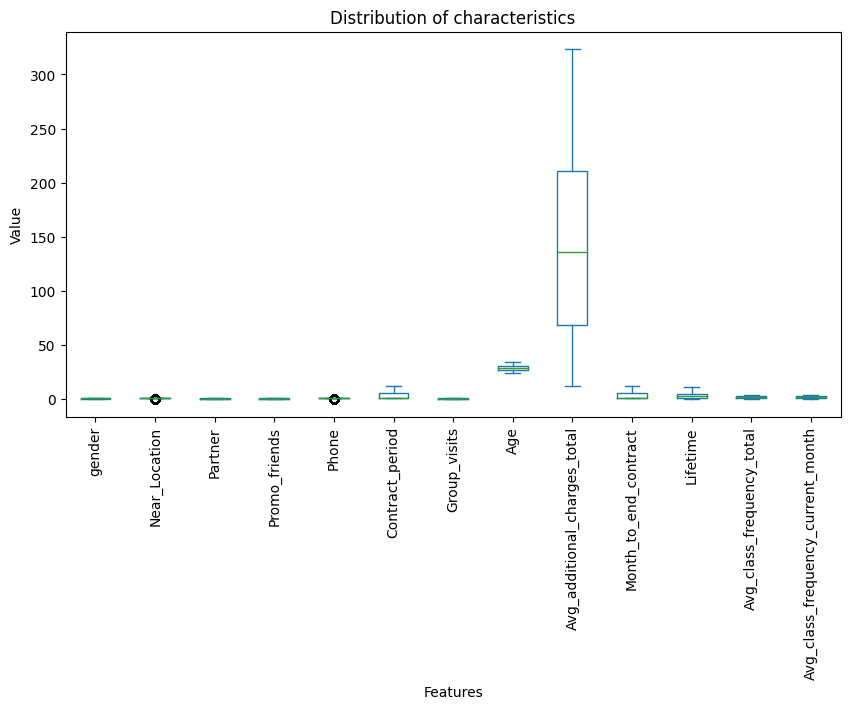

In [12]:
# Box plot
df.drop('Churn',axis=1).plot(kind='box', figsize=[10,5], title='Distribution of characteristics',
xlabel='Features', ylabel='Value')
plt.xticks(rotation=90)
plt.show()

Ya no hay outliers en el DataFrame original. Finalmente se filtrará por estado de cancelación o no y se mostrarán sus distribuciones.

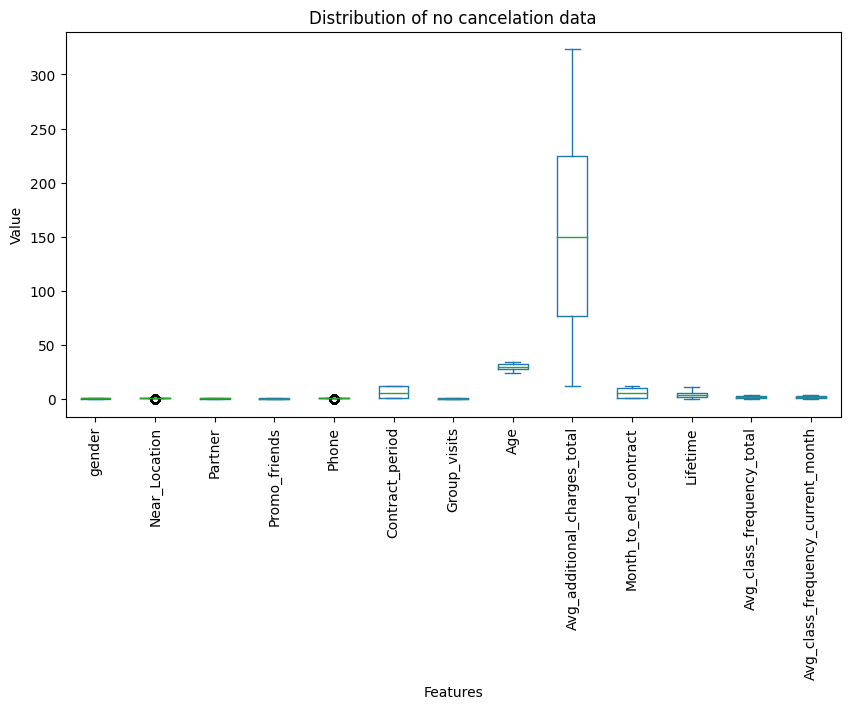

In [13]:
# Filter by column 'Churn'
df_0 = df[df['Churn'] == 0]

# Box plot
df_0.drop('Churn',axis=1).plot(kind='box', figsize=[10,5], title='Distribution of no cancelation data',
xlabel='Features', ylabel='Value')
plt.xticks(rotation=90)
plt.show()

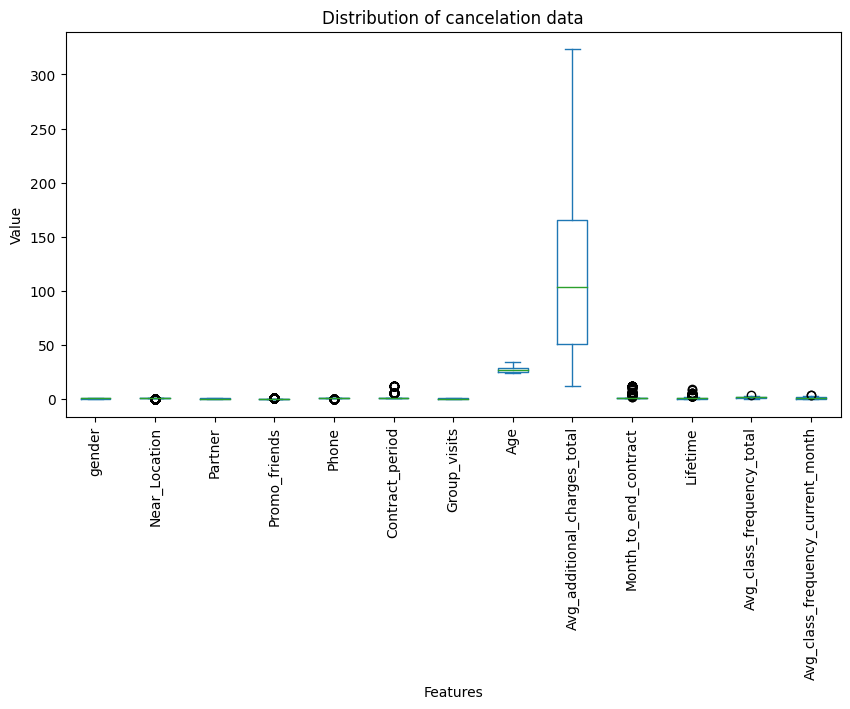

In [14]:
# Filter by column 'Churn'
df_1 = df[df['Churn'] == 1]

# Box plot
df_1.drop('Churn',axis=1).plot(kind='box', figsize=[10,5], title='Distribution of cancelation data',
xlabel='Features', ylabel='Value')
plt.xticks(rotation=90)
plt.show()

A continuación se muestra la matriz de correlación entre las columas.

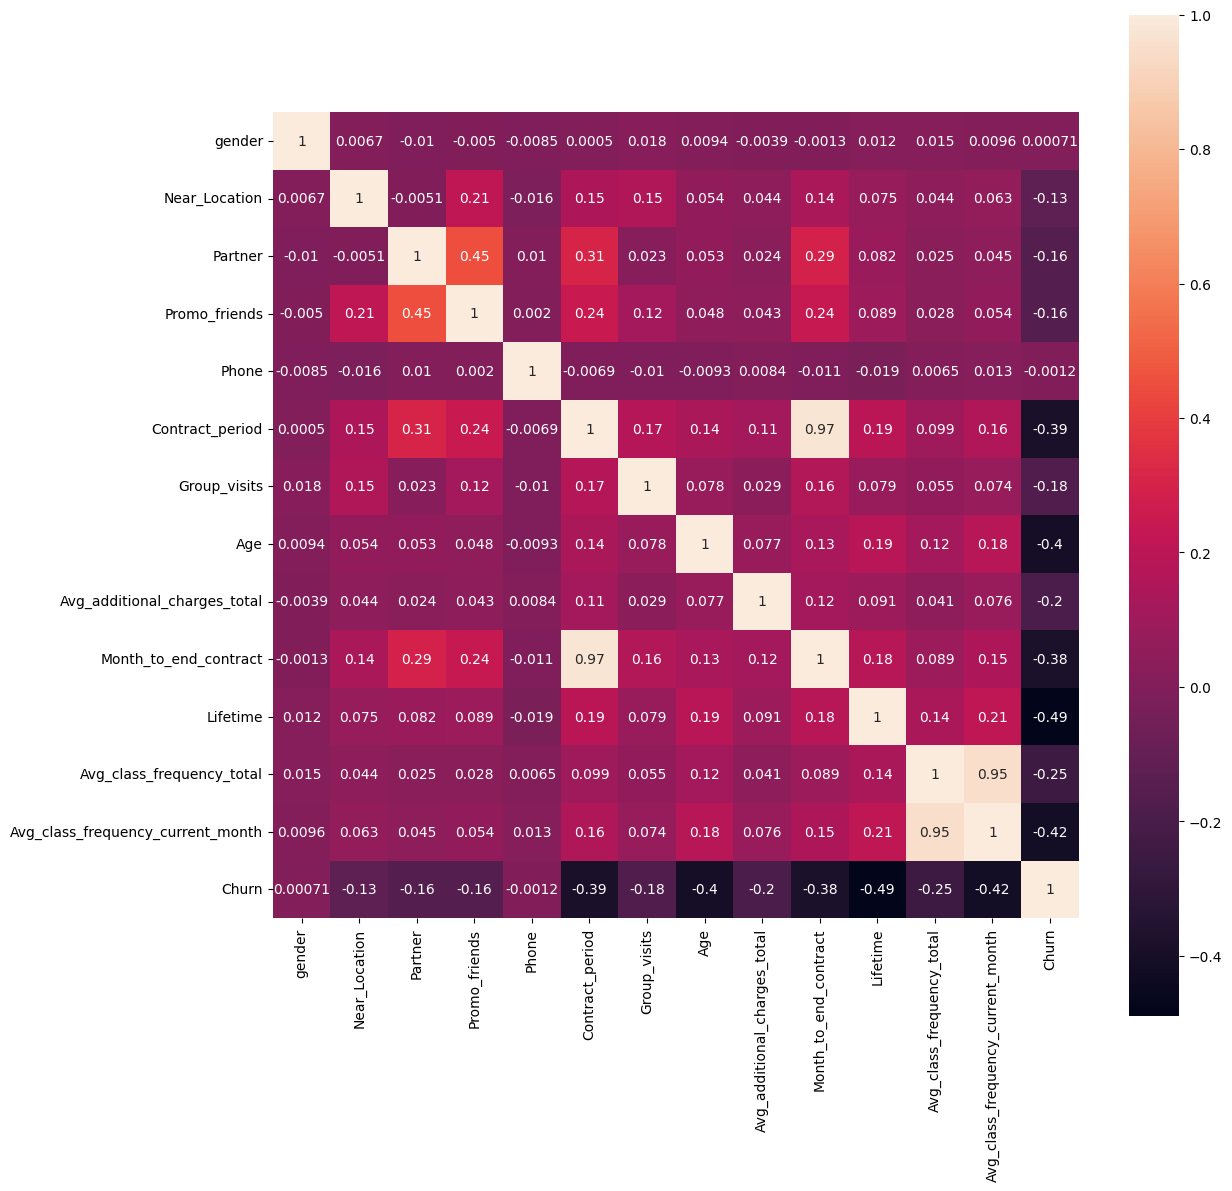

In [15]:
# Correlation matrix
cm = df.corr()

# Heatmap
plt.figure(figsize = (13,13))
sns.heatmap(cm, annot=True, square=True)
plt.show()

Al obsevar la última fila, se tiene una correlación lineal más fuerte (positiva o negativa) entre las columnas 'Contract_period', 'Age', 'Lifetime' y 'Avg_class_frequency_current_month' con la variable objetivo 'Churn'. Practicamente no hay correlación lineal entre las columnas 'gender', 'Phone' y la variable objetivo. Para reafirmar esta afirmación, se usan gráficos de dispersión (scatter plots), pero dado que la variable objetivo es binaria, este tipo de gráficos no son ilustrativos. Por ejemplo.

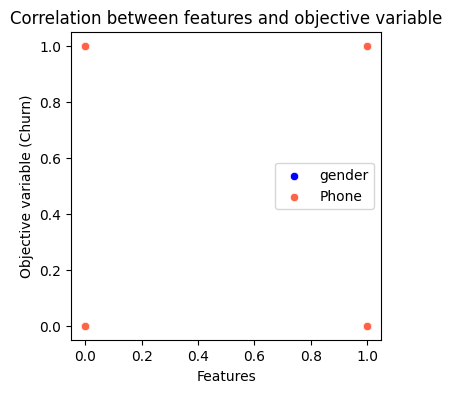

In [16]:
# Scatter plots
plt.figure(figsize = (4,4))
sns.scatterplot(x = df['gender'], y = df['Churn'], color='blue')
sns.scatterplot(x = df['Phone'], y = df['Churn'], color='tomato')
plt.title('Correlation between features and objective variable')
plt.legend(['gender','Phone'])
plt.xlabel('Features')
plt.ylabel('Objective variable (Churn)')
plt.show()

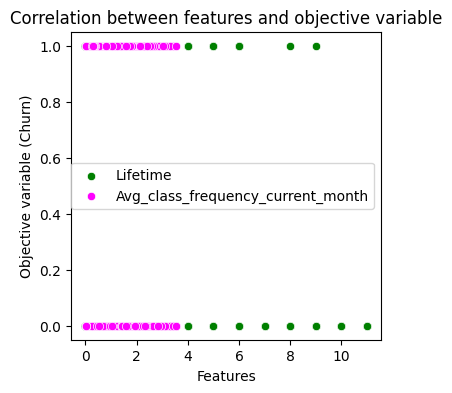

In [17]:
# Scatter plots
plt.figure(figsize = (4,4))
sns.scatterplot(x = df['Lifetime'], y = df['Churn'], color='green')
sns.scatterplot(x = df['Avg_class_frequency_current_month'], y = df['Churn'], color='magenta')
plt.title('Correlation between features and objective variable')
plt.legend(['Lifetime','Avg_class_frequency_current_month'])
plt.xlabel('Features')
plt.ylabel('Objective variable (Churn)')
plt.show()

## Construir un modelo para predecir la cancelación de usuarios

El objetivo es crear un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente, implementando métodos de machine learning (ML). Se usarán 2 algoritmos diferentes: regresión logística (Logistic Regression) y bosque aleatorio (Random Forest Classifier). Nótese que se usará el algoritmo "RandomForestClassifier" y no "RandomForestRegressor".

**Nota:** La estandarización es absolutamente necesaria en algritmos como regresión lineal y clustering, por lo tanto, en nuestro caso no es estrictamente necesaria, pero es una buena practica en caso de que se desee probar más algoritmos.

Se procede a crear los modelos de machine learning, primero se determina la matriz de caracteristicas (X) y la variable objetivo (y), después se dividen los datos en conjuntos de entrenamiento y validación, luego, se estandarizan las carateristicas (X) y se entrena el escalador, finalmente se entrena el modelo en el set de entrenamiento con los 2 algoritmos y se obtienen sus metricas.

In [18]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
# Obtain feature matrix (X) and objective variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Scale X_train by training an object StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# Standardize X_test
X_test_st = scaler.transform(X_test)

In [20]:
# Function to show metrics
def print_all_metrics(y_true, y_pred, title=''):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [21]:
# Algorithm 1: Logistic Regression -------------------------
lr_model = LogisticRegression(random_state=0)

# Train the model
lr_model.fit(X_train_st, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_st)

# Print metrics
print_all_metrics(y_test, lr_predictions, title='Logistic Regression:')

Logistic Regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [22]:
# Algorithm 2: Random Forest Classifier ---------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)

print_all_metrics(y_test, rf_predictions, title='Random Forest Classifier:')

Random Forest Classifier:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.81


**Conclusiones:** En ambos modelos, la exactitud (Accuracy) y la presición (Precision) son iguales, sólo cambia la métrica recall. Si la metrica recall es alta, el modelo tenderá a dejar pasar más falsos positivos (FP). Esta métrica es útil en el diagnóstico de enfermedades, es mejor pedirle a un paciente que realice un examen repetido que pasar por alto una enfermedad real. Una métrica recall baja es útil cuando no quieres que haya muchos FP, porque es caro autorizarle un prestamo a un cliente que no va a pagar. Si cada respuesta te cuesta algo, entonces quieres que tu modelo te dé el menor número posible de respuestas falsas. Por lo tanto, se concluye que el modelo por "Random Forest Classifier" es más adecuado para nuestro objetivo.

Por último, se muestrarán los nombres de las columnas y los coeficientes de regresión logística para mostrar cuales caracteristicas impactan más en el veredicto del algoritmo.

In [23]:
# Show columns
print(df.columns)

# Logistic Regression Coeficients
print(lr_model.coef_)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
[[-0.01347115 -0.08882639 -0.08736505 -0.28322678  0.013376   -0.7377294
  -0.39222932 -1.06990395 -0.53324758 -0.54473182 -3.25839612  3.10920176
  -4.20765069]]


Se ve que las características 'Age', 'Lifetime', 'Avg_class_frequency_total' y 'Avg_class_frequency_current_month' impactan más en el veredicto final.

Se muestran también la importancia de característica para árboles de decisión.

In [24]:
# Show columns
print(df.columns)

# Logistic Regression Coeficients
print(rf_model.feature_importances_)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
[0.01179434 0.00885066 0.01237184 0.01247234 0.00650326 0.06280453
 0.01609647 0.11469895 0.09053628 0.07274716 0.27936794 0.13153593
 0.18022031]


Se ve que las características 'Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total' y  'Avg_class_frequency_current_month' impactan más en el veredicto final. Nótese que son casi las mismas que para el otro algoritmo.

## Crear clústeres de usuarios

Se identificarán los clústeres de objetos (usuarios). Se usará el metodo linkage() para generar un dendograma para determinar el número de clusters que se usarán.

In [25]:
# Set feature matrix (X)
X = df.drop('Churn', axis=1)

# Scale X by training an object StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

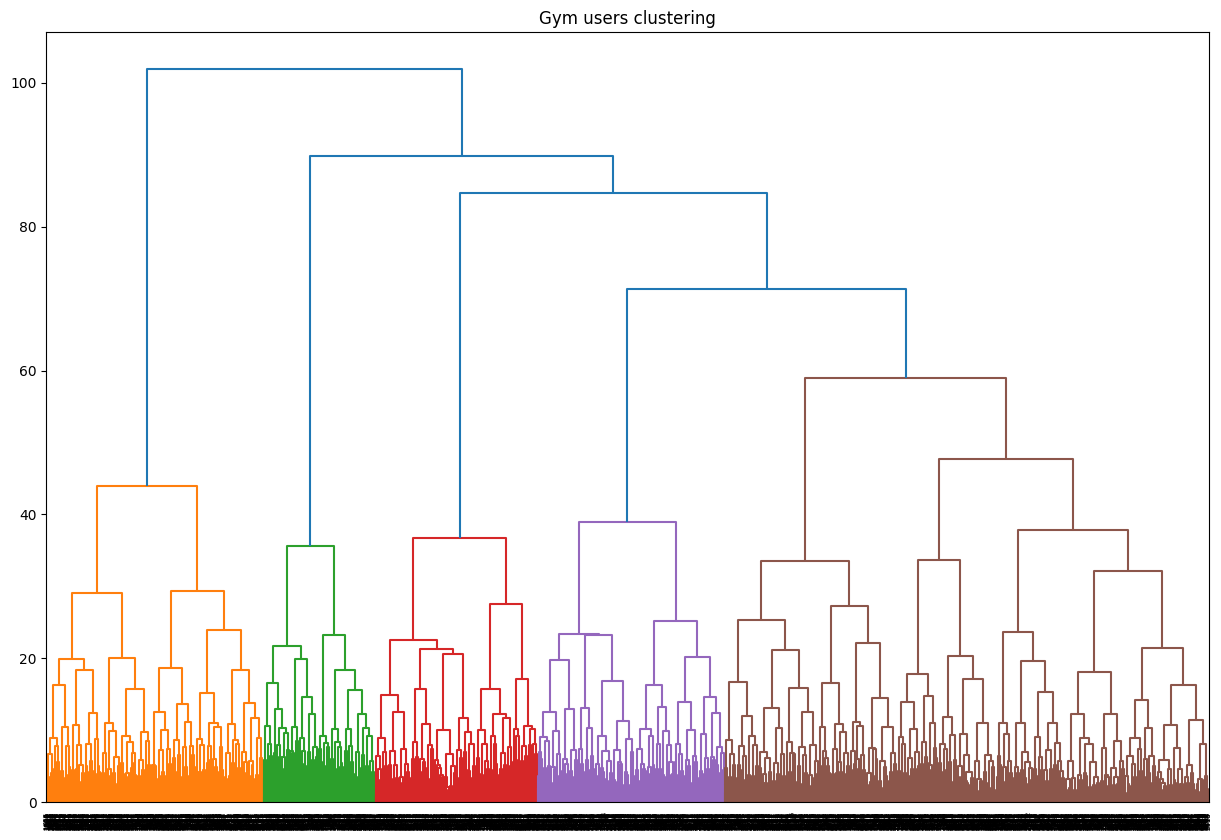

In [26]:
# Obtain the Distance matrix based on the standardized feature matrix (X_sc)
linked = linkage(X_sc, method = 'ward')

# Plot dendogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Gym users clustering')
plt.show()

Se ve que el número sugerido de clusters es 5 (5 colores diferentes), por lo tanto se usarán 5 clusters.

In [27]:
# Set model k_means with 5 clusters
km = KMeans(n_clusters=5)

# Predict clusters (labels from 0 to 4)
labels = km.fit_predict(X_sc)

# Save labels of clusters in the DataFrame
df['cluster_km'] = labels

/home/ant/Project13/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Create clusters
clusters = []
for i in range(0,5):
    cluster = df[df['cluster_km'] == i]
    clusters.append(cluster)

Se compararán los valores promedios de las características de los clústers 0, 1 y 2, el análisis para los demás clústers es similar.

In [29]:
# Mean values for cluster 0
clusters[0].mean()

gender                                 0.523316
Near_Location                          0.862694
Partner                                0.471503
Promo_friends                          0.305699
Phone                                  0.000000
Contract_period                        4.777202
Group_visits                           0.427461
Age                                   29.256477
Avg_additional_charges_total         142.512749
Month_to_end_contract                  4.466321
Lifetime                               3.709845
Avg_class_frequency_total              1.848985
Avg_class_frequency_current_month      1.707065
Churn                                  0.266839
cluster_km                             0.000000
dtype: float64

In [30]:
# Mean values for cluster 1
clusters[1].mean()

gender                                 0.483333
Near_Location                          0.719167
Partner                                0.301667
Promo_friends                          0.026667
Phone                                  1.000000
Contract_period                        1.914167
Group_visits                           0.281667
Age                                   28.168333
Avg_additional_charges_total         128.489888
Month_to_end_contract                  1.821667
Lifetime                               2.051667
Avg_class_frequency_total              1.218067
Avg_class_frequency_current_month      0.940798
Churn                                  0.585000
cluster_km                             1.000000
dtype: float64

In [31]:
# Mean values for cluster 2
clusters[2].mean()

gender                                 0.558628
Near_Location                          0.841814
Partner                                0.247788
Promo_friends                          0.030973
Phone                                  1.000000
Contract_period                        2.543142
Group_visits                           0.417035
Age                                   29.849558
Avg_additional_charges_total         154.810421
Month_to_end_contract                  2.370575
Lifetime                               4.472345
Avg_class_frequency_total              2.629250
Avg_class_frequency_current_month      2.612868
Churn                                  0.097345
cluster_km                             2.000000
dtype: float64

Se puede observar que en general los valores promedio del clúster 1 son menores que los del cluster 0, y los valores promedio del clúster 2 son mayores que los del clúster 1. Estos valores son similares entre el clúster 0 y 2. Al trazar distribuciones de características para los clústeres, se ve que las agrupaciones están dispersas. Por ejemplo, usando las características 'Age' con 'Avg_additional_charges_total' y 'Avg_class_frequency_total' con 'Avg_additional_charges_total'.

In [32]:
# Function to plot the paired features of clusters
def show_clusters_on_plot(df, x_name, y_name, cluster_name='cluster_km'):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=df[x_name], y=df[y_name],hue=df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

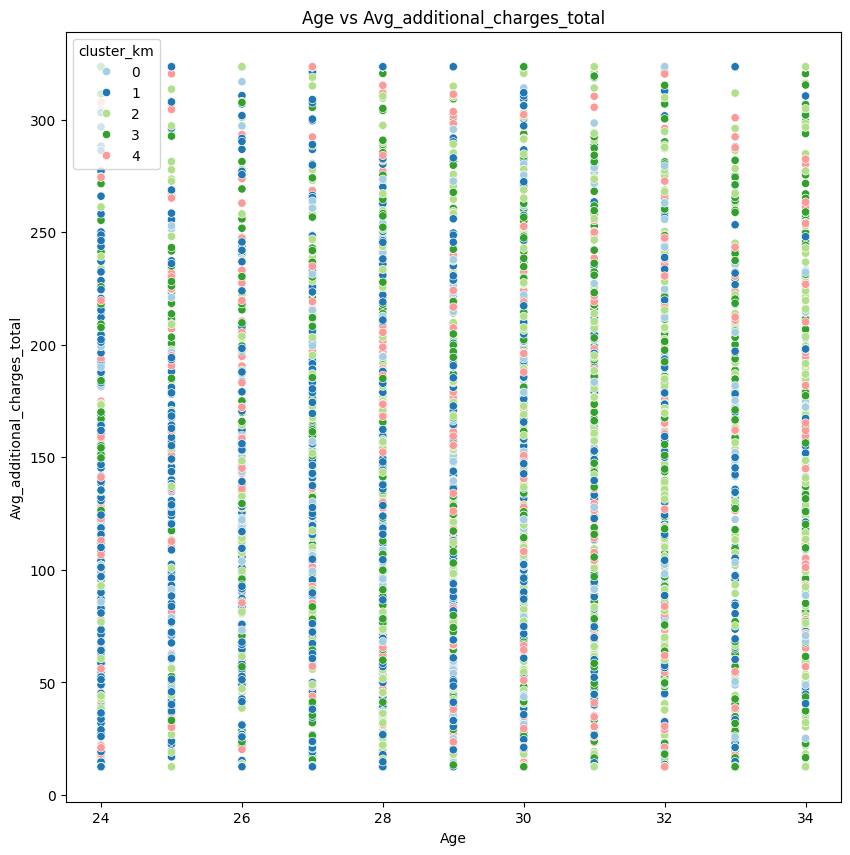

In [33]:
# Plot paired features of clusters
show_clusters_on_plot(df, 'Age', 'Avg_additional_charges_total', 'cluster_km')

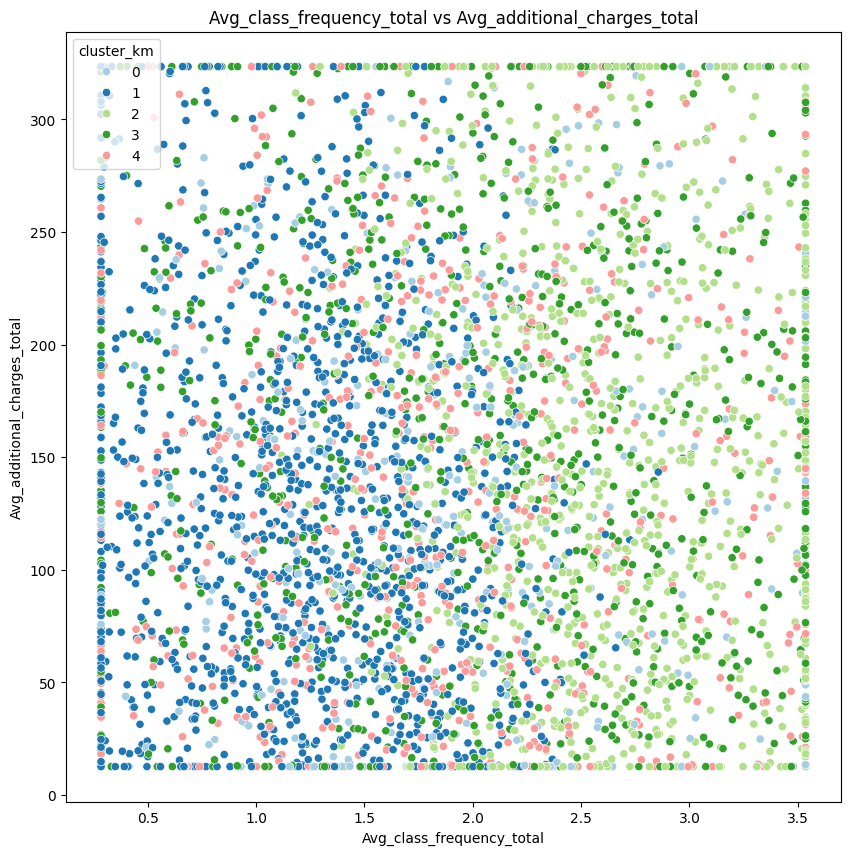

In [34]:
# Plot paired features of clusters
show_clusters_on_plot(df, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'cluster_km')

Al calcular el valor de la silueta para el agrupamiento en general (clustering), se obtiene 0.11, que es bajo (como era de esperarse), por lo tanto, los clústeres no están bien definidos (marcados). El valor de la silueta toma valores de -1 a 1.

In [35]:
# Obtain Silhouette score for the clustering
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.13


Al calcular los valores promedio de la columna Churn, se obtiene.

In [36]:
grouped = df.groupby('cluster_km')['Churn'].mean().sort_values()
grouped.head()

cluster_km
3    0.021814
2    0.097345
4    0.233177
0    0.266839
1    0.585000
Name: Churn, dtype: float64

De manera que los usuarios del cluster 0 son los menos propensos a cancalear su suscripción al gym.

### Conclusiones

Al hacer el preprocesamiento de los datos, se pudo observar que en general los valores promedio de las caacterísticas 'Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', y 'Avg_class_frequency_current_month' son mayores en los usuarios que no cancelaron su suscripción. Acerca las demás características, no se puede determinar nada, no es tan evidente la correlación lineal de sus valores con la cancelación. Después, al obtener los coeficientes de regresión logística y la importancia de característica para árboles de decisión, se demostró que 'Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total' y 'Avg_class_frequency_current_month' son los factores que más impactan en la cancelación. Por lo tanto, se debe reforzar esa parte, por ejemplo, lanzar membresias anuales, individuales o por parejas, hacer clases grupales de cross-fit o cardio, hacer eventos sociales entre los miembros del gym, etc.